In [78]:


# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

In [44]:

# fetch dataset 
adult = fetch_ucirepo(id=2) 
df = pd.concat([adult.data.features, adult.data.targets], axis = 1)
target = 'income'
# remove the full stop stuffix on certain row
df.income = df.income.str.removesuffix(".")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [111]:
# Turn off scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.00,48842.00,48842.00,48842.00,48842.00,48842.00
mean,38.64,189664.13,10.08,1079.07,87.50,40.42
std,13.71,105604.03,2.57,7452.02,403.00,12.39
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117550.50,9.00,0.00,0.00,40.00
50%,37.00,178144.50,10.00,0.00,0.00,40.00
75%,48.00,237642.00,12.00,0.00,0.00,45.00
max,90.00,1490400.00,16.00,99999.00,4356.00,99.00


Text(0.5, 1.0, 'Nulls by row. Total rows = 48842')

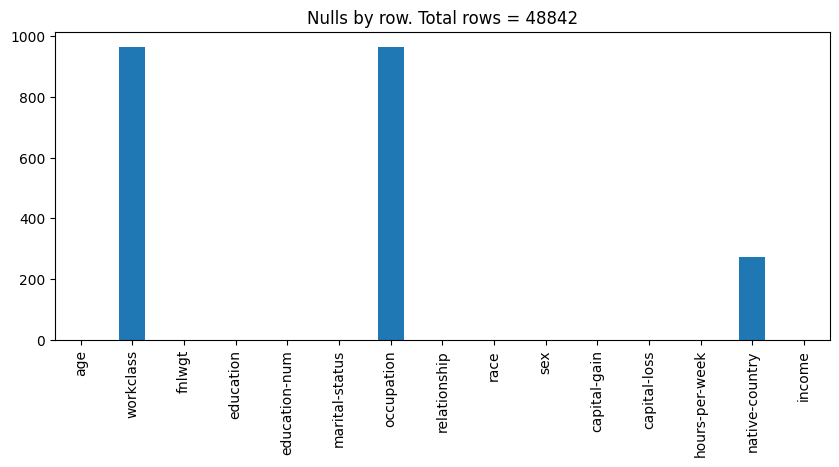

In [46]:
# plot null counts
null_counts = df.isnull().sum(axis=0).transpose()
plt.figure(figsize=(10,4))
null_counts.plot(kind='bar')
plt.title(f'Nulls by row. Total rows = {len(df)}')

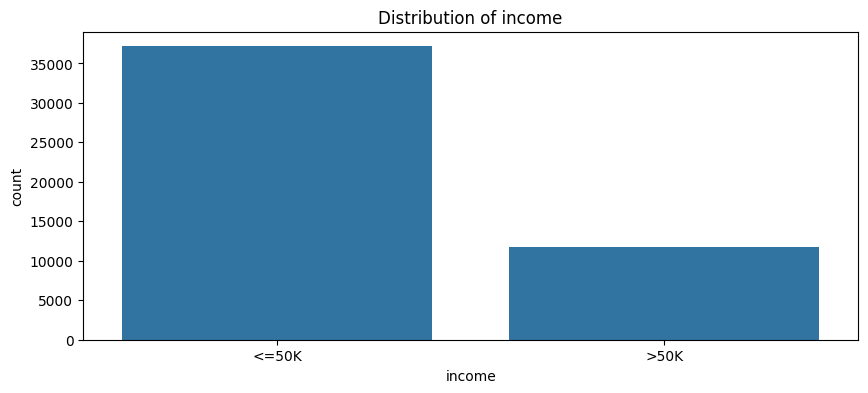

In [103]:
# Countplot for the target variable 'income'
plt.figure(figsize=(10,4))
sns.countplot(x=target, data=df)
plt.title(f'Distribution of {target}')
plt.show()

<Figure size 1000x1000 with 0 Axes>

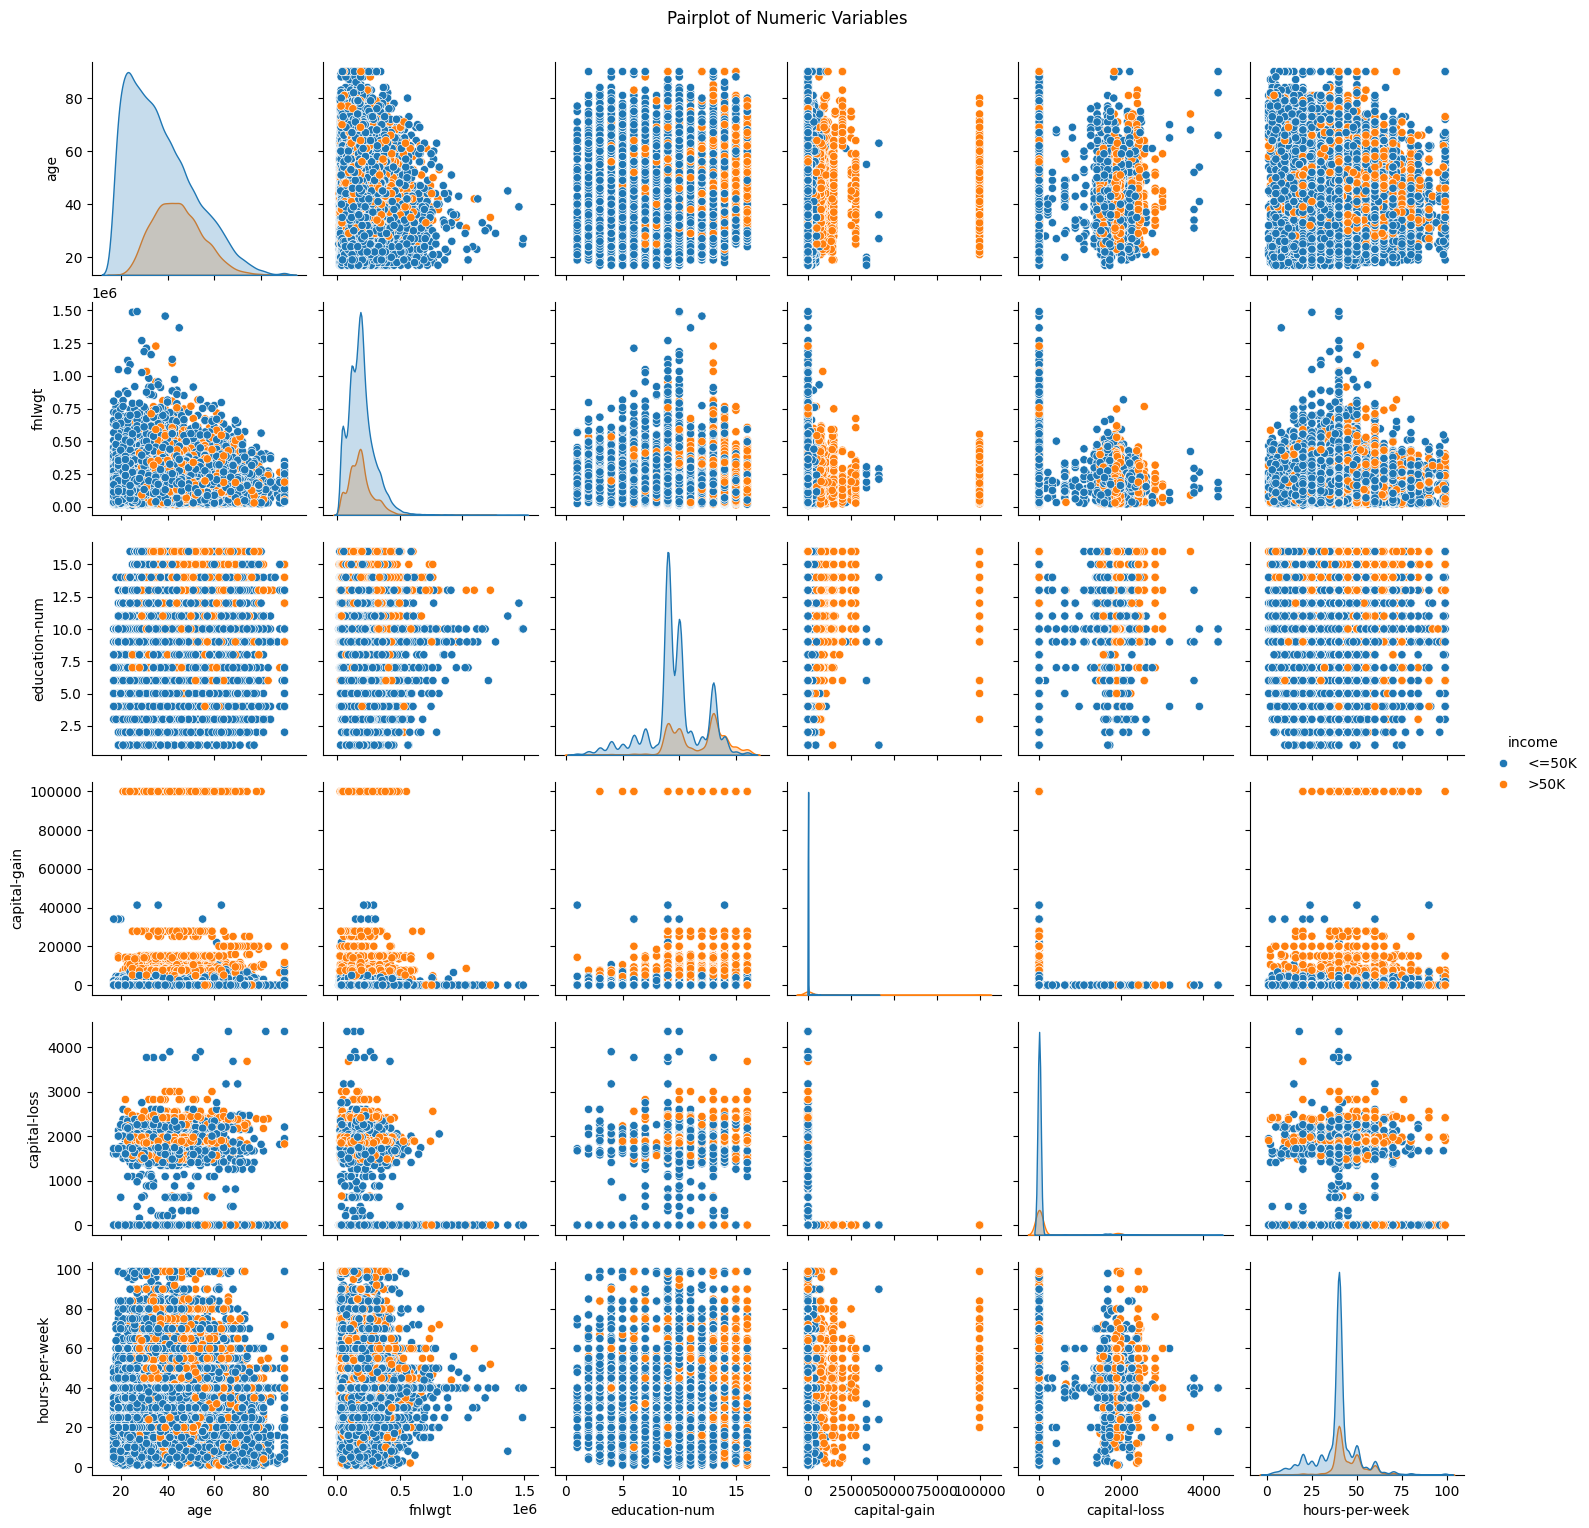

In [108]:
# Pairplot for numeric variables
sample_size = 50_000
numeric_vars = list(df.select_dtypes(include=['int64', 'float64']).columns)
plt.figure(figsize=(10,10))
sns.pairplot(df.sample(min(sample_size, len(df)))[numeric_vars + [target]], hue = target)
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

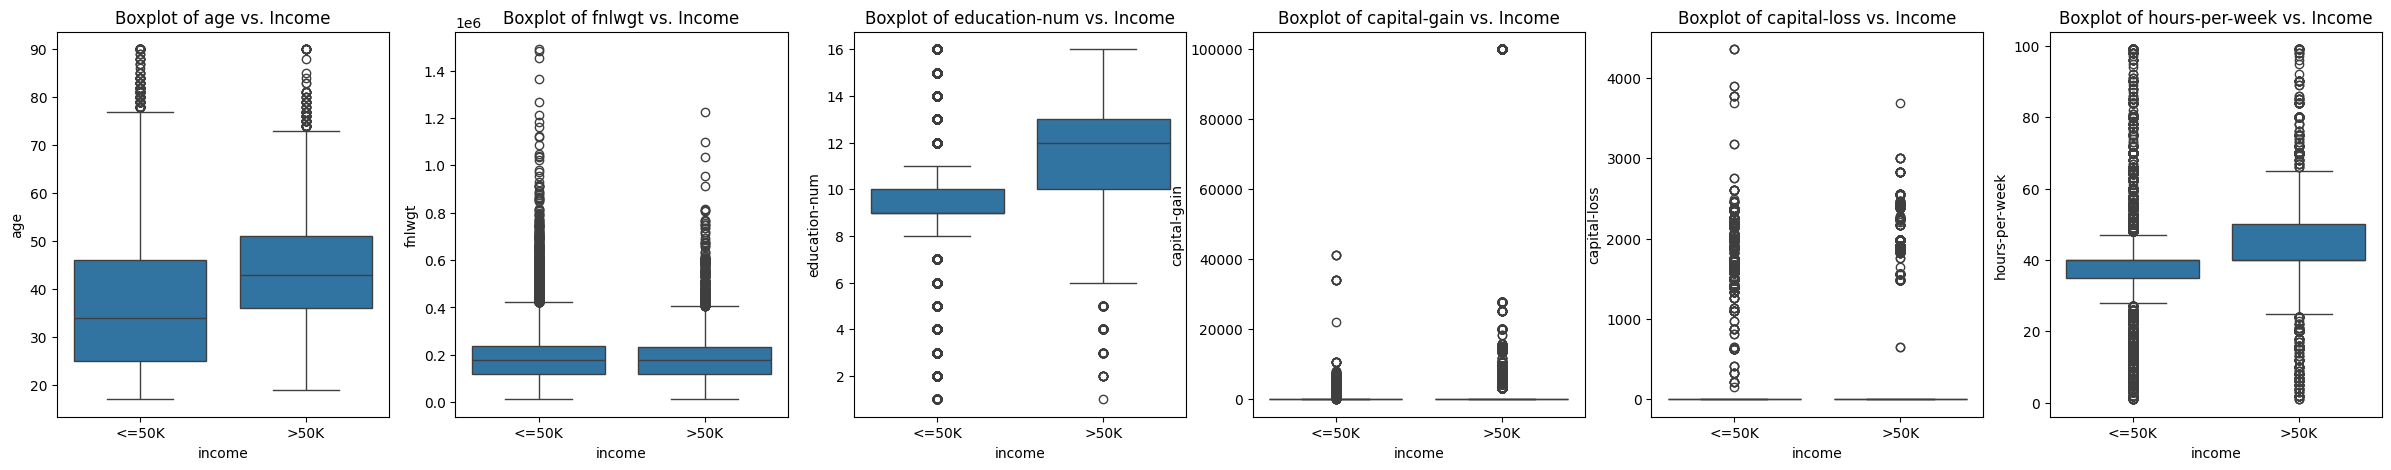

In [87]:
# Boxplot for numeric variables vs. income
import math

ncols = min(len(numeric_vars), 6)
nrows = math.ceil(len(numeric_vars)/ncols)
fig, axs = plt.subplots(nrows, ncols, figsize = (ncols *5, nrows *5))

for var, ax in zip(numeric_vars, axs.ravel()):
    sns.boxplot(x='income', y=var, data=df, ax = ax)
    ax.set_title(f'Boxplot of {var} vs. Income')
plt.show()

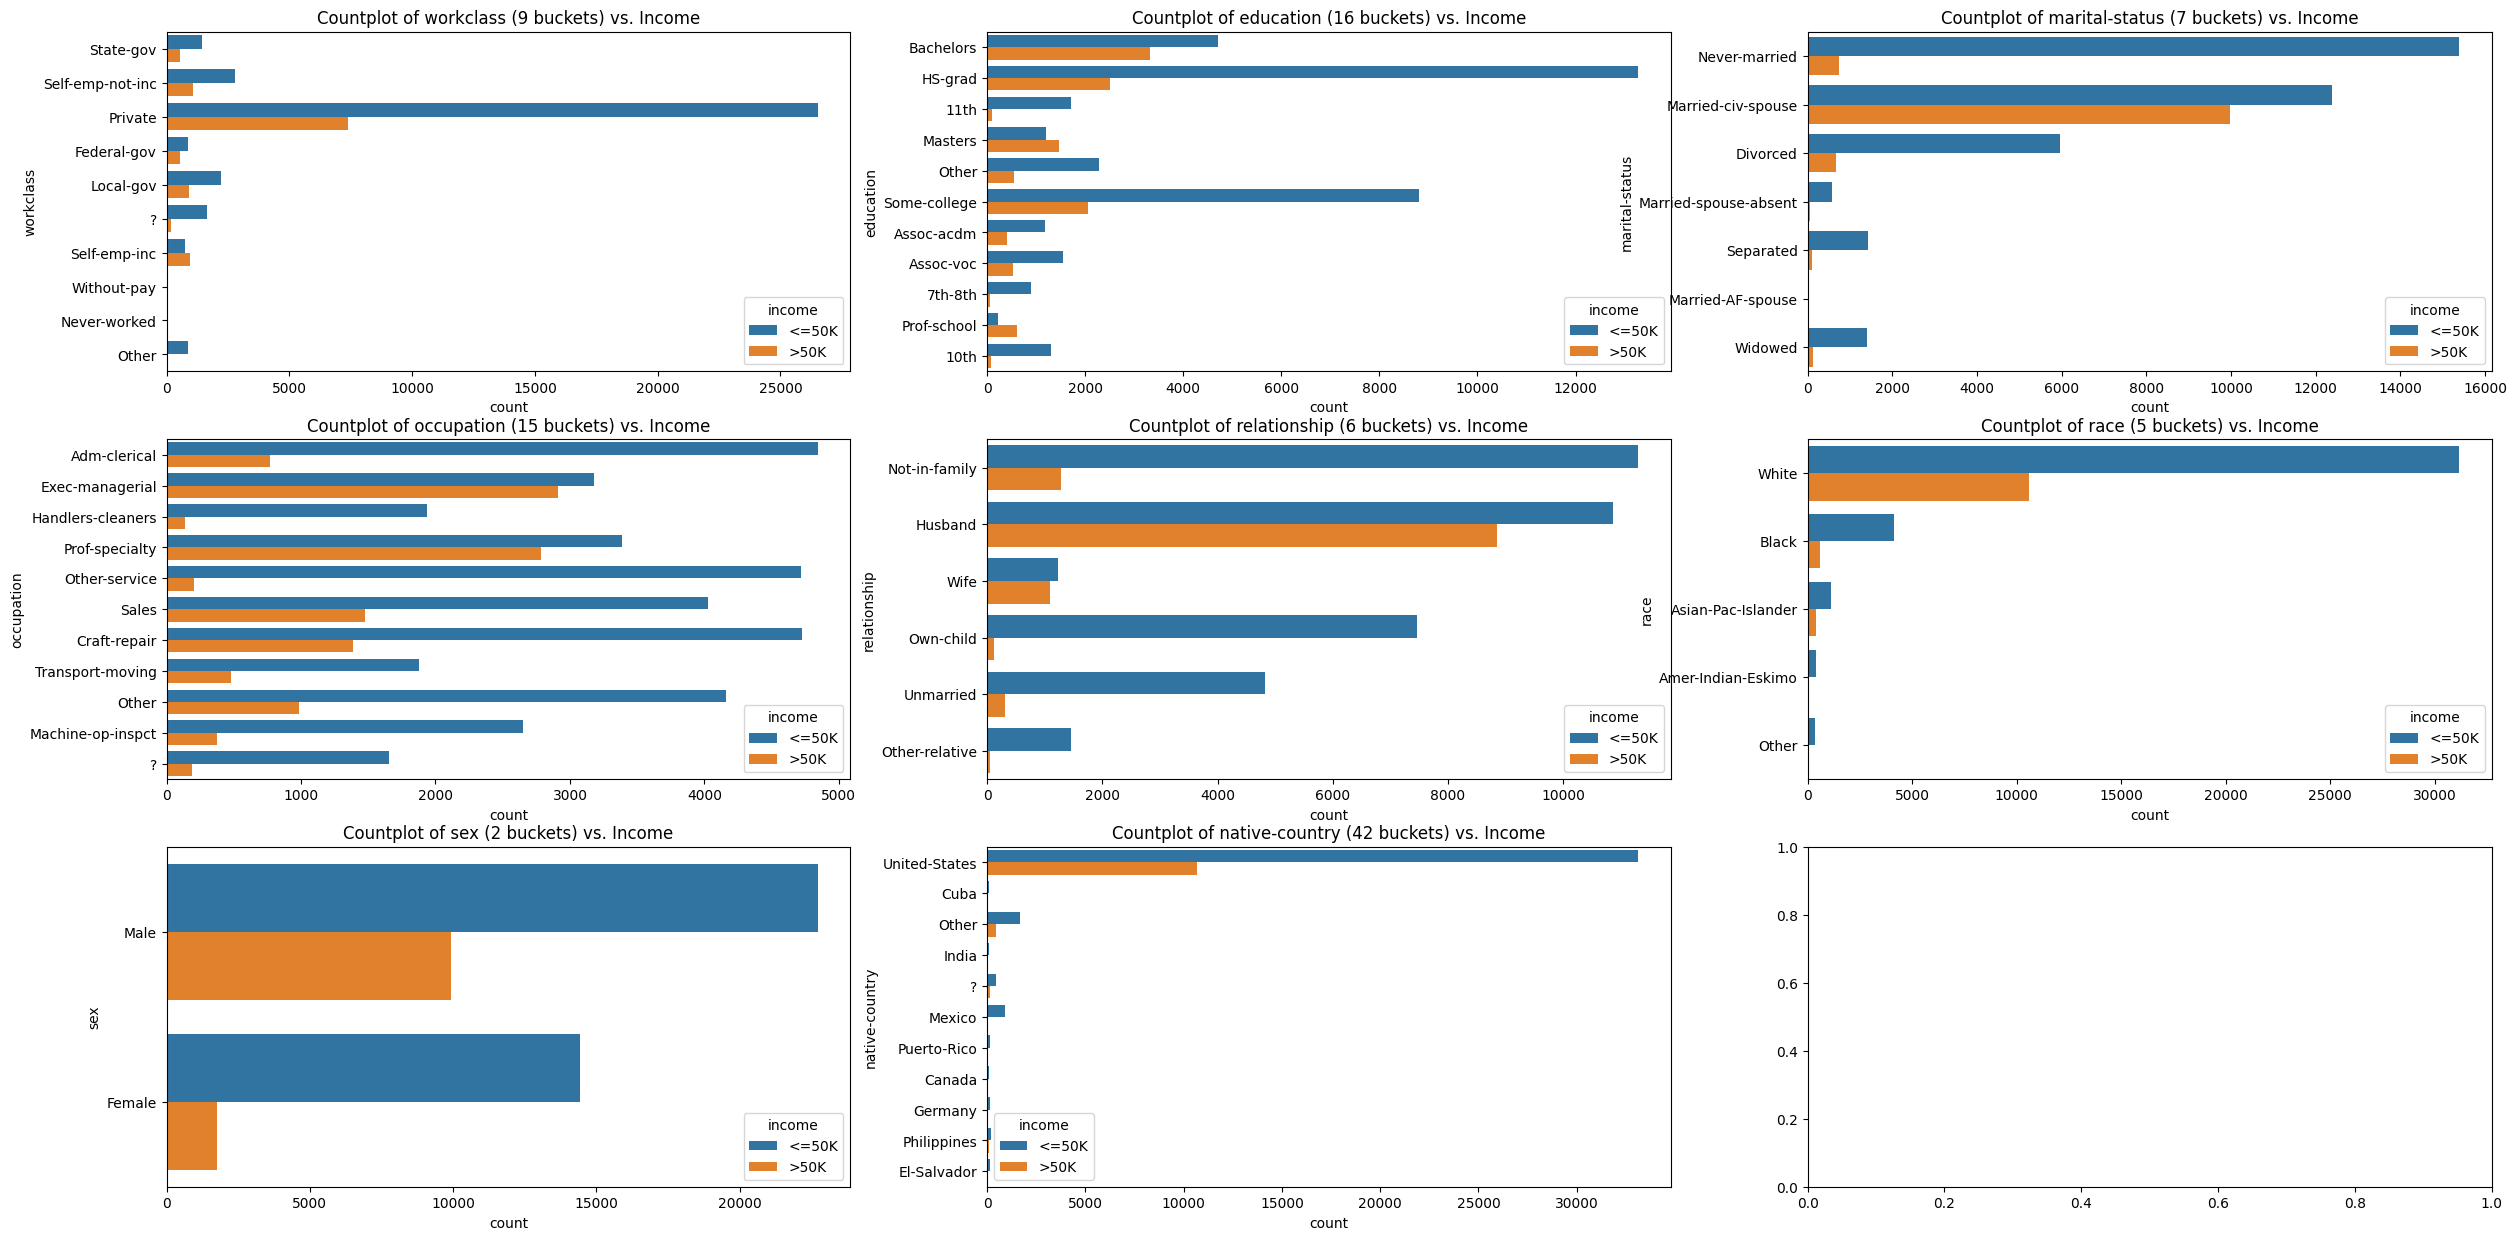

In [86]:
# Countplot for categorical variables

max_buckets = 10 # only plot 10 most frequet buckets, aggregate rest into 'other'

cat_vars = [c for c in df.select_dtypes(include=['object']).columns if c != target]

ncols = min(len(cat_vars), 3)
nrows = math.ceil(len(cat_vars)/ncols)
fig, axs = plt.subplots(nrows, ncols, figsize = (ncols *10, nrows *5))

temp = df.copy()
for var, ax in zip(cat_vars, axs.ravel()):
    bucket_counts = temp[var].value_counts()
    num_buckets = len(bucket_counts)
    top_buckets = bucket_counts[:max_buckets].index
    temp[var] = np.where(temp[var].isin(top_buckets), temp[var], 'Other')

    sns.countplot(y=var, hue='income', data=temp, ax = ax, )
    ax.set_title(f'Countplot of {var} ({num_buckets} buckets) vs. Income')

plt.show()
temp = None

# Fit the Model

Accuracy: 0.85
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7414
        >50K       0.73      0.61      0.66      2355

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769



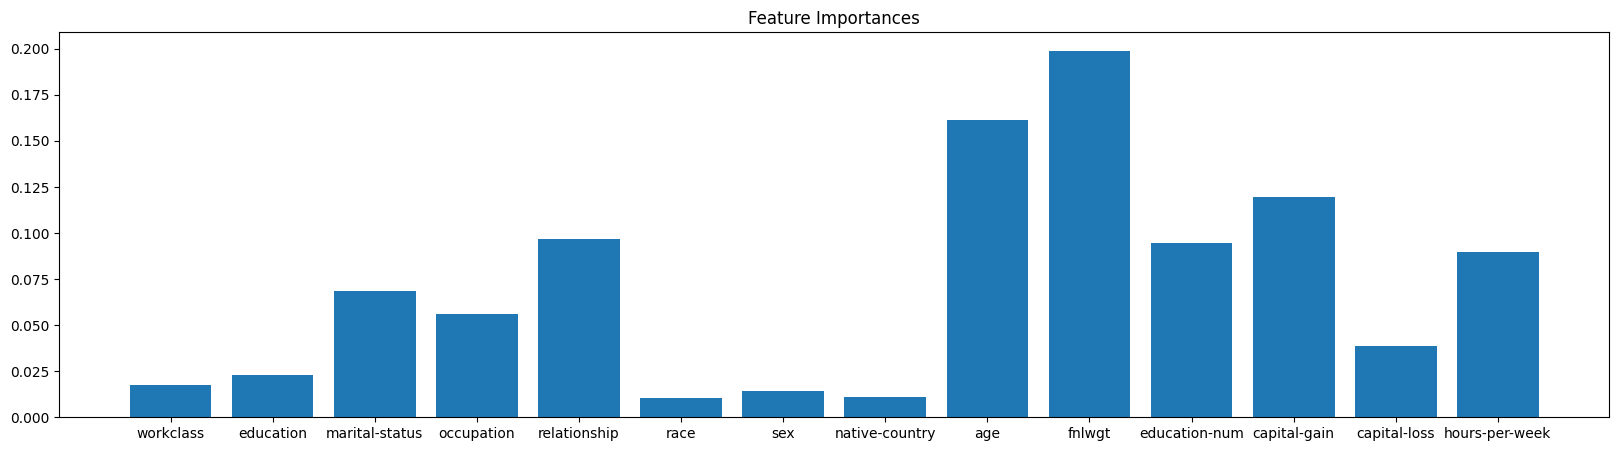

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis =1), df[target], test_size=0.2, random_state=42)

# Create an ordinal encoder for categorical features
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, encoded_missing_value=-1, min_frequency=0.1)

# Create a column transformer to apply the ordinal encoder only to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', ordinal_encoder, cat_vars)
    ],
    remainder='passthrough'  # Pass through numeric features without changes
)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline with preprocessing and the Random Forest classifier
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display additional evaluation metrics
print(classification_report(y_test, y_pred))
plt.figure(figsize=(20,5))
plt.bar(x = cat_vars + numeric_vars, height= model[-1].feature_importances_)
plt.title('Feature Importances')
plt.show()